In [1]:
# Importing required libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix, classification_report
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2
import winsound

In [2]:
# Cerating the path for train, test and validation sets
datadir = "C:/Users/Hi/Downloads/face_mask/"

# make train, test and val dataset path
train_path = os.path.join(datadir, 'train')
test_path = os.path.join(datadir, 'test')
valid_path = os.path.join(datadir, 'val')

In [3]:
# Preprocessing for datasets that have only test and train data

train_datagen = ImageDataGenerator( rescale = 1. / 255, shear_range = 0.2, zoom_range = 0.2, 
                                   horizontal_flip = True) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_batches = train_datagen.flow_from_directory(directory = train_path, 
                                                       batch_size = 10, 
                                                       target_size = (224,224), 
                                                       classes = ['face', 'facemask'])
valid_batches = test_datagen.flow_from_directory(directory = valid_path, 
                                                       batch_size = 10, 
                                                       target_size = (224,224), 
                                                       classes = ['face', 'facemask'])
test_batches = test_datagen.flow_from_directory(directory = test_path,
                                                       target_size = (224,224), 
                                                       classes = ['face', 'facemask'], 
                                                shuffle = False)

Found 1199 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [4]:
# Explore the data 
train_imgs, train_labels = next(train_batches)

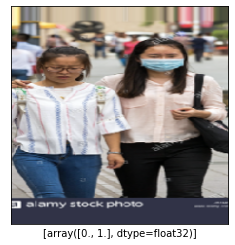

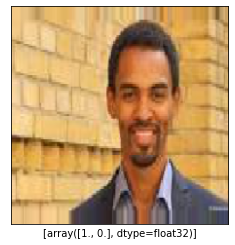

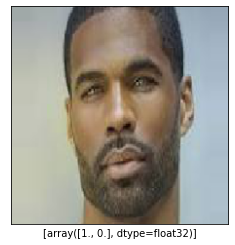

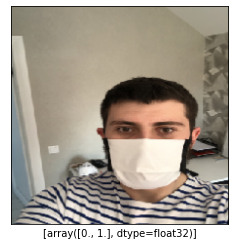

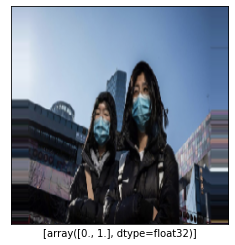

In [5]:
# View the train data
for i in range(5):
    plt.imshow(train_imgs[i], cmap = "gray")
    plt.xlabel([train_labels[i]])
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [6]:
# Model creation

model= Sequential() 
model.add(Conv2D(32, (3, 3), input_shape = (224,224,3))) 
model.add(Activation('relu'))   
model.add(MaxPool2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPool2D(pool_size =(2, 2)))

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPool2D(pool_size =(2, 2)))
  
model.add(Conv2D(128, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPool2D(pool_size =(2, 2))) 

model.add(Conv2D(128, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPool2D(pool_size =(2, 2))) 


model.add(Flatten()) 
model.add(Dense(128)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(2)) 
model.add(Activation('softmax')) 
  
model.compile(loss ='categorical_crossentropy', 
                     optimizer =Adam(learning_rate = 0.0001), 
                   metrics =['accuracy'])

In [7]:
# Fit the training dataset

model.fit(train_batches, validation_data = valid_batches, epochs = 10, steps_per_epoch = len(train_batches), validation_steps = len(valid_batches),verbose = 2)

Train for 120 steps, validate for 4 steps
Epoch 1/10
120/120 - 209s - loss: 0.5110 - accuracy: 0.7465 - val_loss: 0.6654 - val_accuracy: 0.6500
Epoch 2/10
120/120 - 203s - loss: 0.3742 - accuracy: 0.8565 - val_loss: 0.5675 - val_accuracy: 0.7500
Epoch 3/10
120/120 - 187s - loss: 0.3434 - accuracy: 0.8590 - val_loss: 0.4753 - val_accuracy: 0.8250
Epoch 4/10
120/120 - 174s - loss: 0.3139 - accuracy: 0.8866 - val_loss: 0.4562 - val_accuracy: 0.8250
Epoch 5/10
120/120 - 172s - loss: 0.2819 - accuracy: 0.8916 - val_loss: 0.3708 - val_accuracy: 0.8500
Epoch 6/10
120/120 - 175s - loss: 0.2792 - accuracy: 0.8916 - val_loss: 0.3808 - val_accuracy: 0.8750
Epoch 7/10
120/120 - 173s - loss: 0.2628 - accuracy: 0.9049 - val_loss: 0.3473 - val_accuracy: 0.8750
Epoch 8/10
120/120 - 173s - loss: 0.2416 - accuracy: 0.9124 - val_loss: 0.4956 - val_accuracy: 0.8500
Epoch 9/10
120/120 - 174s - loss: 0.2358 - accuracy: 0.9124 - val_loss: 0.3965 - val_accuracy: 0.9000
Epoch 10/10
120/120 - 173s - loss: 0.232

In [8]:
# View the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [9]:
#Saving the model
model.save('C:/Users/Hi/Downloads/face_mask/facemask_detection_model_git.h5')

In [10]:
# Predicting the test data
pred = model.predict(x = test_batches, verbose = 0)

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(pred, axis = 1))

In [12]:
# Showing the class indices
test_batches.class_indices

{'face': 0, 'facemask': 1}

[0.99298334 0.00701663]
Predicted Value is: [0] 99.2983341217041


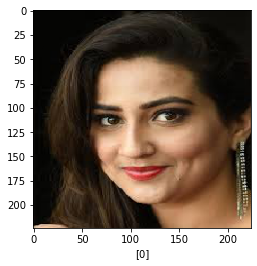

[0.9674421 0.0325579]
Predicted Value is: [0] 96.74420952796936


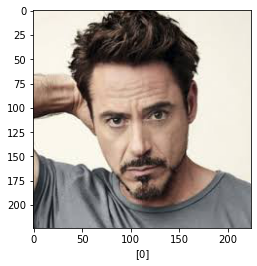

[0.99530303 0.00469698]
Predicted Value is: [0] 99.53030347824097


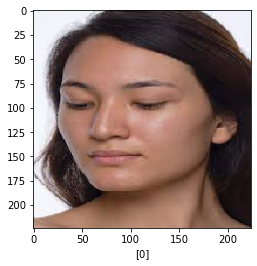

[0.9855921  0.01440794]
Predicted Value is: [0] 98.55921268463135


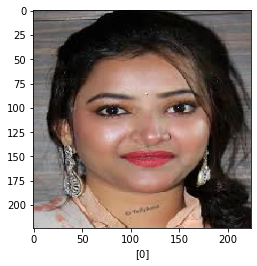

[0.9873275  0.01267251]
Predicted Value is: [0] 98.7327516078949


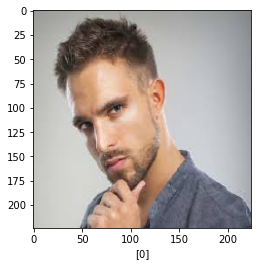

[0.9728396  0.02716036]
Predicted Value is: [0] 97.28395938873291


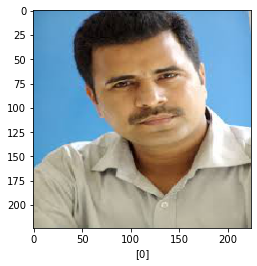

[0.9966383  0.00336165]
Predicted Value is: [0] 99.6638298034668


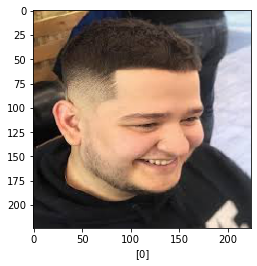

[0.93088907 0.06911092]
Predicted Value is: [0] 93.08890700340271


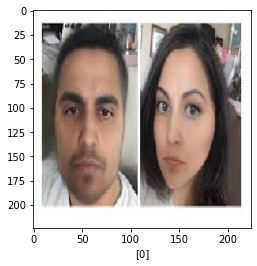

[0.56814295 0.43185702]
Predicted Value is: [0] 56.814295053482056


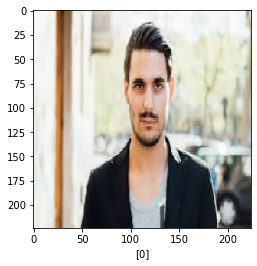

[0.9976222  0.00237775]
Predicted Value is: [0] 99.76221919059753


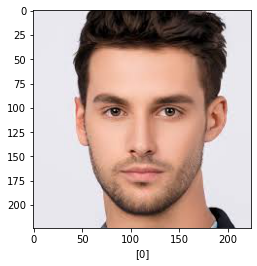

In [13]:
# Viewing the prediction with image
for i in range(10):
    plt.imshow(test_batches[0][0][i], cmap = "gray")
    plt.xlabel([test_batches.classes[i]])
    print(pred[i])
    print("Predicted Value is:", [np.argmax(pred[i])], 100*np.max(pred[i]))
    plt.show()

In [14]:
#Displaying the confusion Matrix
cm

array([[20,  5],
       [ 2, 19]], dtype=int64)

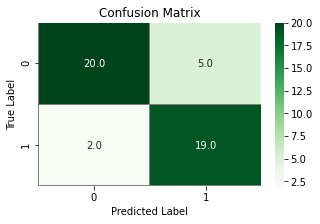

In [15]:
# Plotting Confusion Matrix
f,ax = plt.subplots(figsize=(5, 3))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Classification Report
print(classification_report(y_true = test_batches.classes, y_pred = np.argmax(pred, axis = 1), target_names = ['Face (Class 0)','Facemask (Class 1)']))

                    precision    recall  f1-score   support

    Face (Class 0)       0.91      0.80      0.85        25
Facemask (Class 1)       0.79      0.90      0.84        21

          accuracy                           0.85        46
         macro avg       0.85      0.85      0.85        46
      weighted avg       0.86      0.85      0.85        46



In [32]:
# preparing the data from my pics using opencv
x_data = []
pred_path = "C:/Users/Hi/Downloads/pred/pred"
for i in os.listdir(pred_path):
    path = (os.path.join(pred_path,i))
    im = cv2.imread((path),cv2.IMREAD_GRAYSCALE)
    im = cv2.resize(im, (224,224))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im/255.0
    x_data.append(im)
x_data =np.array(x_data)
pred_new = model.predict(x = x_data, verbose = 0)

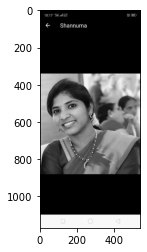

[0.9220555  0.07794458]
Predicted Value is: [0] 92.20554828643799


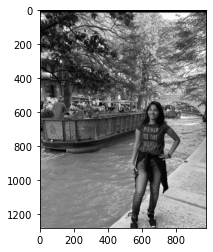

[0.00461593 0.99538404]
Predicted Value is: [1] 99.53840374946594


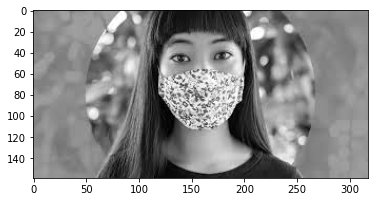

[0.15281358 0.84718645]
Predicted Value is: [1] 84.71864461898804


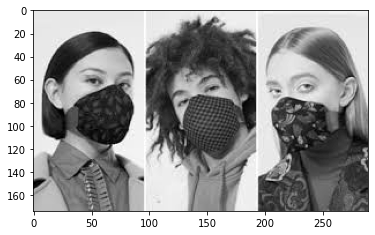

[3.808658e-04 9.996191e-01]
Predicted Value is: [1] 99.96191263198853


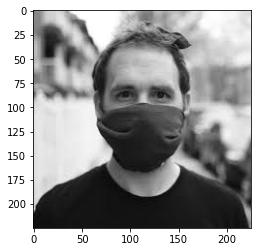

[0.9818718  0.01812826]
Predicted Value is: [0] 98.18717837333679


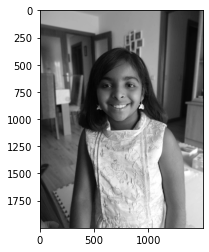

[0.12439845 0.8756016 ]
Predicted Value is: [1] 87.5601589679718


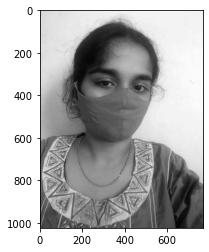

[0.948638 0.051362]
Predicted Value is: [0] 94.86380219459534


In [36]:
pred_path = "C:/Users/Hi/Downloads/pred/pred"
j = 0
for i in os.listdir(pred_path):
    img_array = cv2.imread(os.path.join(pred_path,i), cv2.IMREAD_GRAYSCALE)
    img_array = img_array/255.0
    plt.imshow(img_array, cmap ='gray')
    plt.show()
    print(pred_new[j])
    print("Predicted Value is:", [np.argmax(pred_new[j])], 100*np.max(pred_new[j]))
    j = j+1